In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('Datos_de_DallasTexas_sin_nulos.csv')
data.head(5)

,Unnamed: 0,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2024-11-18,city scrape,Close to downtown and Uptown. Fast and conven...,Enjoy the heart of Dallas right out your door ...,Sasha,2010-11-26,within an hour,1.00,f,...,4.85,4.92,4.75,4.77,f,1,1,0,0,0.33
1,1,2024-11-18,previous scrape,Additional discount for 2nd and 3rd month. Per...,"The address is 4340 Cedar Springs Road Dallas,...",Robert,2011-11-17,within an hour,0.46,f,...,4.91,4.96,4.89,4.93,f,1,1,0,0,0.40
2,2,2024-11-18,city scrape,***** Over 30% Discounts for stays over 30 day...,Located in Turtle Creek neighborhood steps fro...,Michelle,2012-11-19,within an hour,0.90,f,...,4.91,4.97,4.91,4.76,f,1,1,0,0,0.49
3,3,2024-11-18,city scrape,No description available,No overview available,Rodney,2011-07-11,a few days or more,0.42,f,...,4.85,4.85,4.81,4.78,f,1,0,1,0,0.24
4,4,2024-11-18,city scrape,"Traveling nurses, SMU students welcome - 10% d...",Wonderful big trees and nice sidewalks through...,Judy,2012-12-27,within an hour,0.95,t,...,4.93,4.93,4.92,4.83,f,3,0,3,0,0.72


In [57]:
#Verificamos los valores 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    5307 non-null   int64  
 1   last_scraped                                  5307 non-null   object 
 2   source                                        5307 non-null   object 
 3   description                                   5307 non-null   object 
 4   neighborhood_overview                         5307 non-null   object 
 5   host_name                                     5307 non-null   object 
 6   host_since                                    5307 non-null   object 
 7   host_response_time                            5307 non-null   object 
 8   host_acceptance_rate                          5307 non-null   float64
 9   host_is_superhost                             5307 non-null   o

In [58]:
#Corroboramos valores nulos del dataframe
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0


In [ ]:
# Creo 2 DataFrames para poder procesar los outliers
cuantitativas = data.iloc[:, np.r_[8, 11, 16, 17, 20, 22, 23, 25:34, 36:45, 46:51]]  # Columnas específicas
cualitativas = data.iloc[:, np.r_[0:8, 9, 10, 12:16, 17:20, 21, 24, 35, 45]] 

<Figure size 1500x800 with 0 Axes>

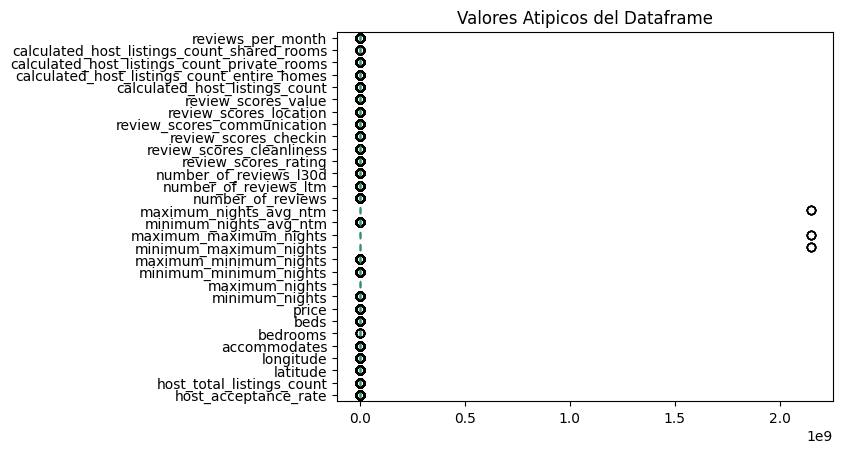

In [61]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig= plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #Dibujamos el diagrama

In [62]:
#Metodo aplicado desviacion estandar. Encuentro los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_acceptance_rate                            1.517670e+00
host_total_listings_count                       2.509808e+03
latitude                                        3.300211e+01
longitude                                      -9.665151e+01
accommodates                                    1.552187e+01
bedrooms                                        5.805037e+00
beds                                            8.765898e+00
price                                           1.797302e+03
minimum_nights                                  6.771673e+01
maximum_nights                                  1.597356e+03
minimum_minimum_nights                          6.149367e+01
maximum_minimum_nights                          6.798549e+01
minimum_maximum_nights                          1.996971e+08
maximum_maximum_nights                          1.996971e+08
minimum_nights_avg_ntm                          6.612681e+01
maximum_nights_avg_ntm                          1.996971e+0

In [63]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe 
data3 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data3

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,3.0,32.816900,-96.820180,3.0,1.0,2.0,85.0,30.0,1125,...,4.62,4.85,4.92,4.75,4.77,1.0,1.0,0.0,0.0,0.33
1,0.46,3.0,32.814420,-96.815480,1.0,1.0,2.0,115.0,30.0,90,...,4.87,4.91,4.96,4.89,4.93,1.0,1.0,0.0,0.0,0.40
2,0.90,4.0,32.803270,-96.809760,2.0,1.0,1.0,243.0,30.0,365,...,4.97,4.91,4.97,4.91,4.76,1.0,1.0,0.0,0.0,0.49
3,0.42,3.0,32.987800,-96.789190,2.0,1.0,1.0,62.0,7.0,40,...,4.74,4.85,4.85,4.81,4.78,1.0,0.0,1.0,0.0,0.24
4,0.95,3.0,32.855090,-96.706250,2.0,1.0,1.0,43.0,7.0,730,...,4.82,4.93,4.93,4.92,4.83,3.0,0.0,3.0,0.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,0.97,4.0,32.778840,-96.809664,4.0,2.0,2.0,133.0,2.0,365,...,4.70,4.80,4.80,4.70,4.70,2.0,2.0,0.0,0.0,0.00
5303,0.99,26.0,32.887421,-96.766373,2.0,0.0,1.0,75.0,1.0,730,...,4.70,4.80,4.80,4.70,4.70,12.0,12.0,0.0,0.0,0.00
5304,0.90,1.0,32.832872,-96.676974,2.0,1.0,1.0,92.0,1.0,5,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00
5305,0.90,2.0,32.734874,-96.886520,4.0,2.0,2.0,114.0,1.0,365,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00


In [64]:
#Corroboramos valores nulos del dataframe 
valores_nulos = data3.isnull().sum()
valores_nulos

host_acceptance_rate                            205
host_total_listings_count                       122
latitude                                         40
longitude                                        89
accommodates                                    167
bedrooms                                         66
beds                                            114
price                                            37
minimum_nights                                   85
maximum_nights                                    0
minimum_minimum_nights                           71
maximum_minimum_nights                           87
minimum_maximum_nights                            5
maximum_maximum_nights                            5
minimum_nights_avg_ntm                           83
maximum_nights_avg_ntm                            5
number_of_reviews                               106
number_of_reviews_ltm                            99
number_of_reviews_l30d                          111
review_score

In [65]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean= data3.copy()
data_clean= data_clean.fillna(round(data3.mean(),1))
data_clean

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,3.0,32.816900,-96.820180,3.0,1.0,2.0,85.0,30.0,1125,...,4.62,4.85,4.92,4.75,4.77,1.0,1.0,0.0,0.0,0.33
1,0.46,3.0,32.814420,-96.815480,1.0,1.0,2.0,115.0,30.0,90,...,4.87,4.91,4.96,4.89,4.93,1.0,1.0,0.0,0.0,0.40
2,0.90,4.0,32.803270,-96.809760,2.0,1.0,1.0,243.0,30.0,365,...,4.97,4.91,4.97,4.91,4.76,1.0,1.0,0.0,0.0,0.49
3,0.42,3.0,32.987800,-96.789190,2.0,1.0,1.0,62.0,7.0,40,...,4.74,4.85,4.85,4.81,4.78,1.0,0.0,1.0,0.0,0.24
4,0.95,3.0,32.855090,-96.706250,2.0,1.0,1.0,43.0,7.0,730,...,4.82,4.93,4.93,4.92,4.83,3.0,0.0,3.0,0.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,0.97,4.0,32.778840,-96.809664,4.0,2.0,2.0,133.0,2.0,365,...,4.70,4.80,4.80,4.70,4.70,2.0,2.0,0.0,0.0,0.00
5303,0.99,26.0,32.887421,-96.766373,2.0,0.0,1.0,75.0,1.0,730,...,4.70,4.80,4.80,4.70,4.70,12.0,12.0,0.0,0.0,0.00
5304,0.90,1.0,32.832872,-96.676974,2.0,1.0,1.0,92.0,1.0,5,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00
5305,0.90,2.0,32.734874,-96.886520,4.0,2.0,2.0,114.0,1.0,365,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00


In [66]:
#Corroboramos valores nulos del dataframe 
valores_nulos = data_clean.isnull().sum()
valores_nulos


host_acceptance_rate                            0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0


**Procedimiento "Cuantiles" para sustituir outliers en dataframe**

In [67]:
#Metodo aplicado Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentiles25= y.quantile(0.25) #Q1
percentiles75= y.quantile(0.75) #Q2
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr

print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate                               1.150000
host_total_listings_count                         94.500000
latitude                                          32.901727
longitude                                        -96.690740
accommodates                                      12.000000
bedrooms                                           6.000000
beds                                               6.000000
price                                            329.750000
minimum_nights                                    11.000000
maximum_nights                                  1277.500000
minimum_minimum_nights                             6.000000
maximum_minimum_nights                            14.500000
minimum_maximum_nights                          2265.000000
maximum_maximum_nights                          2265.000000
minimum_nights_avg_ntm                            15.550000
maximum_nights_avg_ntm                          2265.000000
number_of_revi

In [68]:
#Obtenemos datos limpios del dataframe 
data3_iqr = cuantitativas[(y <= Limite_Superior_iqr)&(y >= Limite_Inferior_iqr)]
data3_iqr

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,3.0,32.816900,-96.820180,3.0,1.0,2.0,85.0,NaN,1125,...,4.62,4.85,4.92,4.75,4.77,1.0,1.0,0.0,0.0,0.33
1,NaN,3.0,32.814420,-96.815480,1.0,1.0,2.0,115.0,NaN,90,...,4.87,4.91,4.96,4.89,4.93,1.0,1.0,0.0,0.0,0.40
2,0.90,4.0,32.803270,-96.809760,2.0,1.0,1.0,243.0,NaN,365,...,4.97,4.91,4.97,4.91,4.76,1.0,1.0,0.0,0.0,0.49
3,NaN,3.0,NaN,-96.789190,2.0,1.0,1.0,62.0,7.0,40,...,4.74,4.85,4.85,4.81,4.78,1.0,0.0,NaN,0.0,0.24
4,0.95,3.0,32.855090,-96.706250,2.0,1.0,1.0,43.0,7.0,730,...,4.82,4.93,4.93,4.92,4.83,3.0,0.0,NaN,0.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,0.97,4.0,32.778840,-96.809664,4.0,2.0,2.0,133.0,2.0,365,...,4.70,4.80,4.80,4.70,4.70,2.0,2.0,0.0,0.0,0.00
5303,0.99,26.0,32.887421,-96.766373,2.0,0.0,1.0,75.0,1.0,730,...,4.70,4.80,4.80,4.70,4.70,12.0,12.0,0.0,0.0,0.00
5304,0.90,1.0,32.832872,NaN,2.0,1.0,1.0,92.0,1.0,5,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00
5305,0.90,2.0,32.734874,-96.886520,4.0,2.0,2.0,114.0,1.0,365,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00


In [69]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

host_acceptance_rate                             528
host_total_listings_count                        527
latitude                                         747
longitude                                        206
accommodates                                     249
bedrooms                                          19
beds                                             292
price                                            464
minimum_nights                                  1047
maximum_nights                                     0
minimum_minimum_nights                          1001
maximum_minimum_nights                          1157
minimum_maximum_nights                             5
maximum_maximum_nights                             5
minimum_nights_avg_ntm                          1090
maximum_nights_avg_ntm                             5
number_of_reviews                                563
number_of_reviews_ltm                            345
number_of_reviews_l30d                        

In [70]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del datafraame
data4_iqr= data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,3.0,32.816900,-96.820180,3.0,1.0,2.0,85.0,1.9,1125,...,4.62,4.85,4.92,4.75,4.77,1.0,1.0,0.0,0.0,0.33
1,1.00,3.0,32.814420,-96.815480,1.0,1.0,2.0,115.0,1.9,90,...,4.87,4.91,4.96,4.89,4.93,1.0,1.0,0.0,0.0,0.40
2,0.90,4.0,32.803270,-96.809760,2.0,1.0,1.0,243.0,1.9,365,...,4.97,4.91,4.97,4.91,4.76,1.0,1.0,0.0,0.0,0.49
3,1.00,3.0,32.800000,-96.789190,2.0,1.0,1.0,62.0,7.0,40,...,4.74,4.85,4.85,4.81,4.78,1.0,0.0,0.0,0.0,0.24
4,0.95,3.0,32.855090,-96.706250,2.0,1.0,1.0,43.0,7.0,730,...,4.82,4.93,4.93,4.92,4.83,3.0,0.0,0.0,0.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,0.97,4.0,32.778840,-96.809664,4.0,2.0,2.0,133.0,2.0,365,...,4.70,4.80,4.80,4.70,4.70,2.0,2.0,0.0,0.0,0.00
5303,0.99,26.0,32.887421,-96.766373,2.0,0.0,1.0,75.0,1.0,730,...,4.70,4.80,4.80,4.70,4.70,12.0,12.0,0.0,0.0,0.00
5304,0.90,1.0,32.832872,-96.800000,2.0,1.0,1.0,92.0,1.0,5,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00
5305,0.90,2.0,32.734874,-96.886520,4.0,2.0,2.0,114.0,1.0,365,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00


In [71]:
#Unimos el dataframe cuantitativo con el dataframe cualitativo
Datos_limpios = pd. concat([cualitativas, data4_iqr], axis = 1)
Datos_limpios

,Unnamed: 0,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_is_superhost,host_neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2024-11-18,city scrape,Close to downtown and Uptown. Fast and conven...,Enjoy the heart of Dallas right out your door ...,Sasha,2010-11-26,within an hour,f,Oak Lawn,...,4.62,4.85,4.92,4.75,4.77,1.0,1.0,0.0,0.0,0.33
1,1,2024-11-18,previous scrape,Additional discount for 2nd and 3rd month. Per...,"The address is 4340 Cedar Springs Road Dallas,...",Robert,2011-11-17,within an hour,f,Oak Lawn,...,4.87,4.91,4.96,4.89,4.93,1.0,1.0,0.0,0.0,0.40
2,2,2024-11-18,city scrape,***** Over 30% Discounts for stays over 30 day...,Located in Turtle Creek neighborhood steps fro...,Michelle,2012-11-19,within an hour,f,Oak Lawn,...,4.97,4.91,4.97,4.91,4.76,1.0,1.0,0.0,0.0,0.49
3,3,2024-11-18,city scrape,No description available,No overview available,Rodney,2011-07-11,a few days or more,f,North Central Dallas,...,4.74,4.85,4.85,4.81,4.78,1.0,0.0,0.0,0.0,0.24
4,4,2024-11-18,city scrape,"Traveling nurses, SMU students welcome - 10% d...",Wonderful big trees and nice sidewalks through...,Judy,2012-12-27,within an hour,t,Old Lake Highlands,...,4.82,4.93,4.93,4.92,4.83,3.0,0.0,0.0,0.0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,5302,2024-11-18,city scrape,"As you step inside, you are greeted by an open...",No overview available,Abby,2020-10-25,within an hour,t,Dallas Downtown Historic District,...,4.70,4.80,4.80,4.70,4.70,2.0,2.0,0.0,0.0,0.00
5303,5303,2024-11-18,city scrape,"After a day of adventure, relax in the cozy li...",Nearby attractions<br />Dallas Museum of Art -...,Ibrar,2019-09-22,within an hour,t,Glenbrook-Belltown,...,4.70,4.80,4.80,4.70,4.70,12.0,12.0,0.0,0.0,0.00
5304,5304,2024-11-18,city scrape,Located five minutes from the Dallas Arboretum...,No overview available,Isaac,2019-10-15,Unknown,f,Casa View,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00
5305,5305,2024-11-18,city scrape,No description available,No overview available,Leah,2024-08-27,Unknown,f,Oak Cliff,...,4.70,4.80,4.80,4.70,4.70,1.0,1.0,0.0,0.0,0.00


In [72]:
#Corroboramos calores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_is_superhost                               0
host_neighbourhood                              0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
longitude                                       0
property_type                                   0
room_type                                       0
bathrooms_text                                  0
amenities                                       0
calendar_last_scraped                           0


In [73]:
#Corroboramos calores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [74]:
#Convertir Dataframa a CSV
Datos_limpios.to_csv("Dallas_limpio.csv")